In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.shape

(53940, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.duplicated().sum()

146

In [8]:
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df1 = df.copy()

In [11]:
def check_outliers(column):
    q1 = df1[column].quantile(0.25)
    q3 = df1[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    return lower,upper

In [12]:
df['carat'].describe()

count    53794.00000
mean         0.79778
std          0.47339
min          0.20000
25%          0.40000
50%          0.70000
75%          1.04000
max          5.01000
Name: carat, dtype: float64

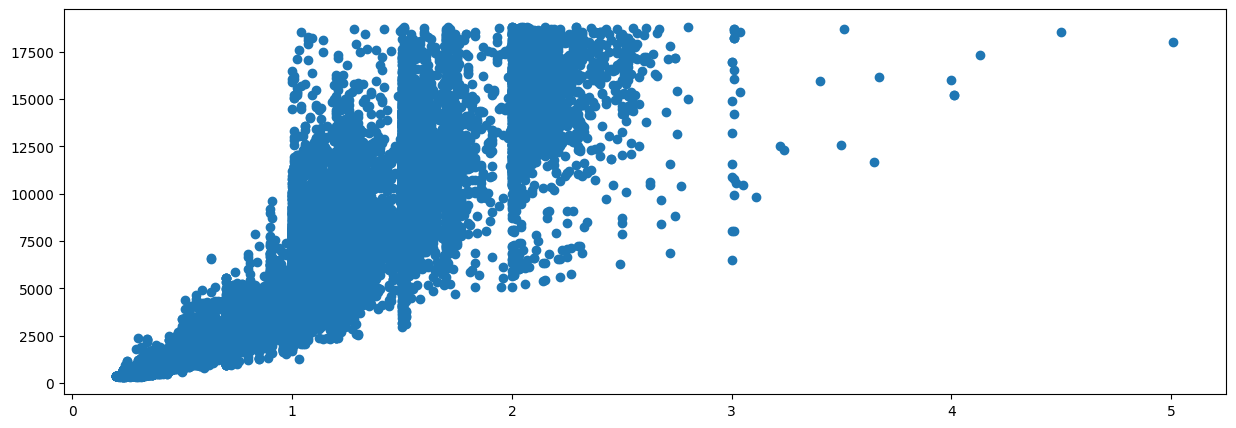

In [13]:
plt.figure(figsize=(15,5))
plt.scatter(df['carat'],df['price'])

<Axes: ylabel='carat'>

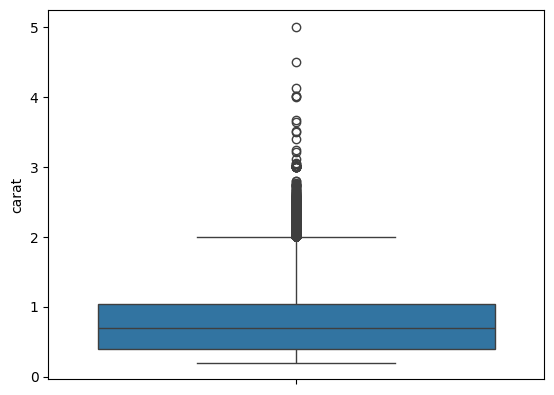

In [14]:
sns.boxplot(df['carat'])

In [15]:
lower_carat,upper_carat = check_outliers('carat')
lower_carat,upper_carat

(-0.5599999999999999, 2.0)

In [16]:
df1.loc[df1['carat']>=upper_carat,'carat'] = upper_carat
df1.loc[df1['carat']<=lower_carat,'carat'] = lower_carat

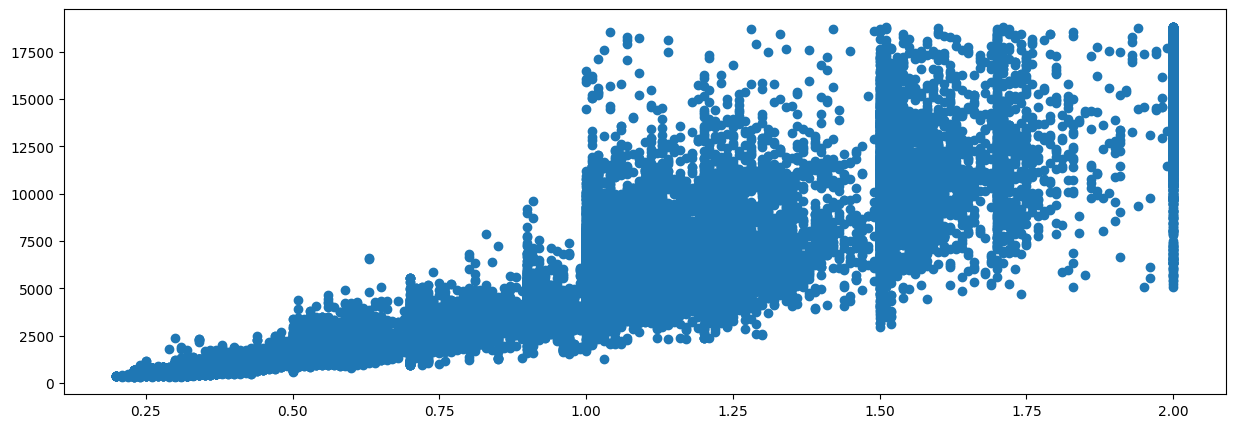

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(df1['carat'],df1['price'])

<Axes: ylabel='carat'>

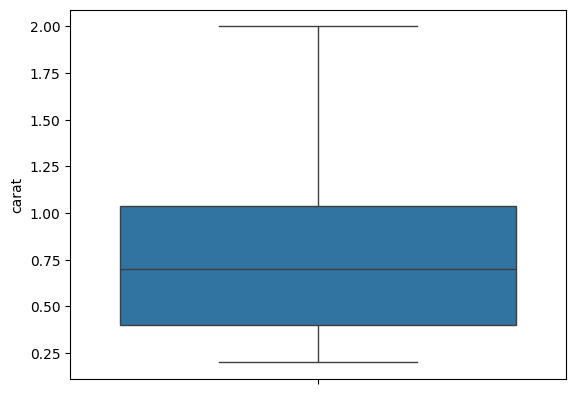

In [18]:
sns.boxplot(df1['carat'])

In [19]:
df['cut'].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

<BarContainer object of 5 artists>

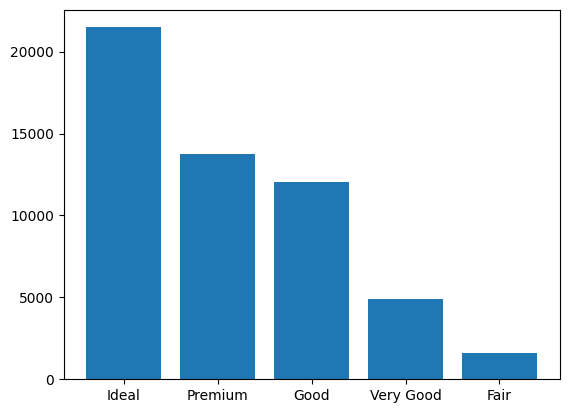

In [20]:
plt.bar(df['cut'].unique(),df['cut'].value_counts())

In [21]:
df['color'].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

<BarContainer object of 7 artists>

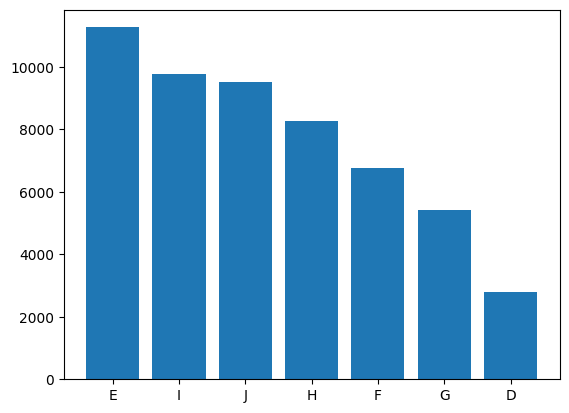

In [22]:
plt.bar(df['color'].unique(),df['color'].value_counts())


In [23]:
df['clarity'].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

<BarContainer object of 8 artists>

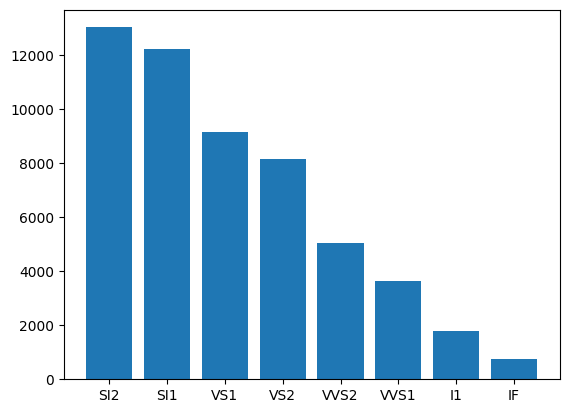

In [24]:
plt.bar(df['clarity'].unique(),df['clarity'].value_counts())

In [25]:
df['depth'].describe()

count    53794.000000
mean        61.748080
std          1.429909
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

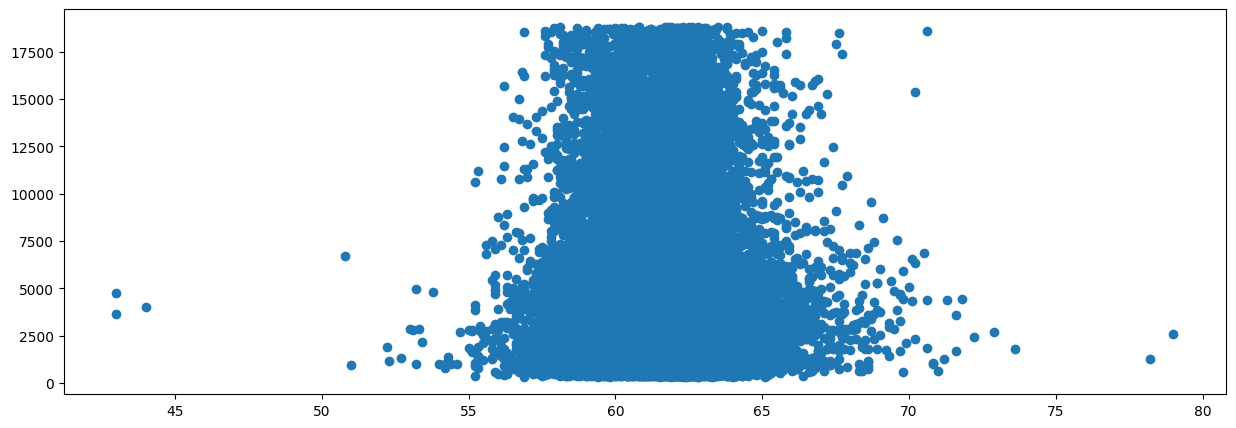

In [26]:
plt.figure(figsize=(15,5))
plt.scatter(df['depth'],df['price'])

<Axes: ylabel='depth'>

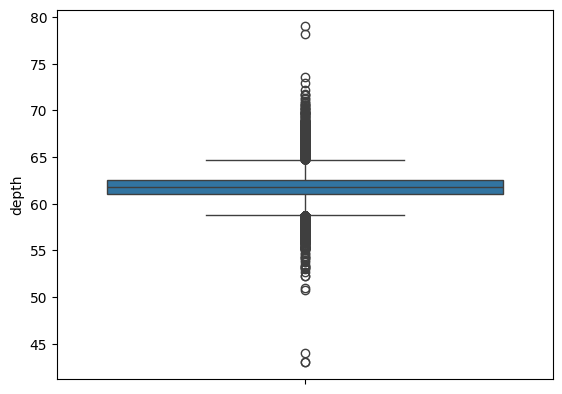

In [27]:
sns.boxplot(df['depth'])

In [28]:
lower_depth,upper_depth = check_outliers('depth')
lower_depth,upper_depth

(58.75, 64.75)

In [29]:
df1.loc[df1['depth']>=upper_depth,'depth'] = upper_depth
df1.loc[df1['depth']<=lower_depth,'depth'] = lower_depth

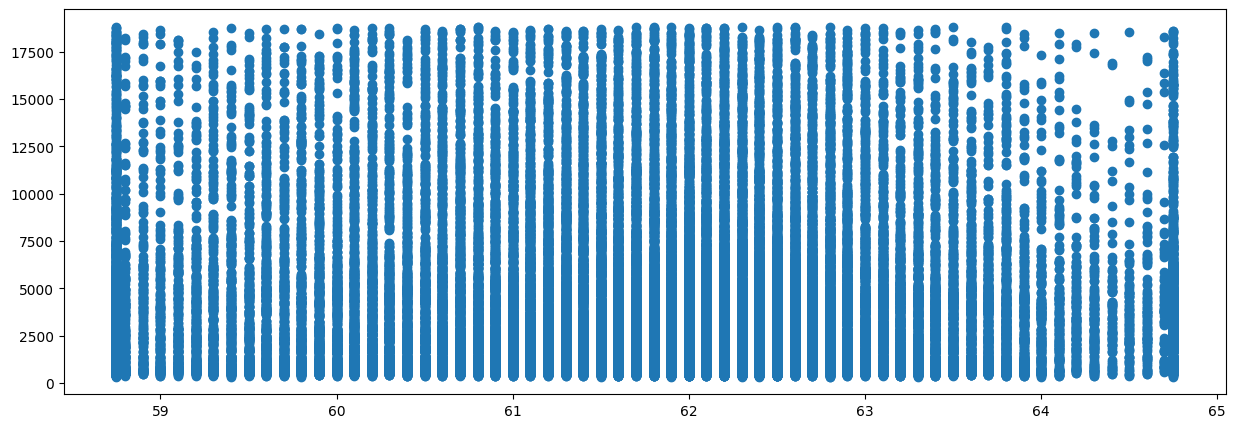

In [30]:
plt.figure(figsize=(15,5))
plt.scatter(df1['depth'],df1['price'])

<Axes: ylabel='depth'>

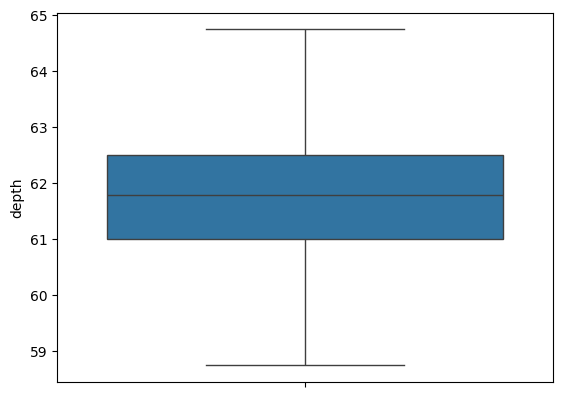

In [31]:
sns.boxplot(df1['depth'])

In [32]:
df['table'].describe()

count    53794.000000
mean        57.458109
std          2.233679
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

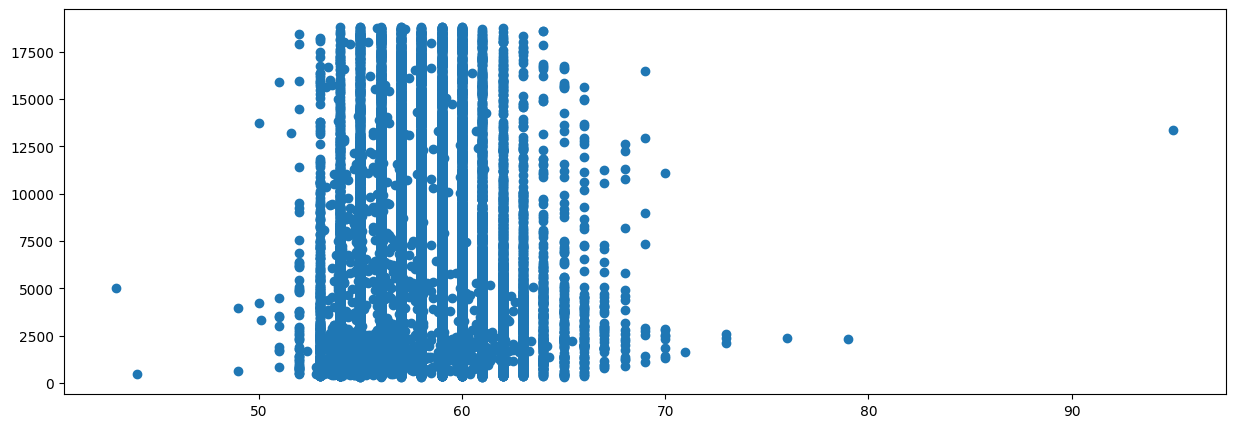

In [33]:
plt.figure(figsize=(15,5))
plt.scatter(df['table'],df['price'])

<Axes: ylabel='table'>

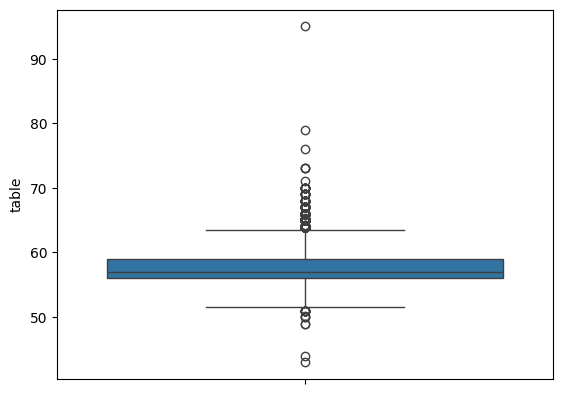

In [34]:
sns.boxplot(df1['table'])

In [35]:
lower_table,upper_table = check_outliers('table')
lower_table,upper_table

(51.5, 63.5)

In [36]:
df1.loc[df1['table']>=upper_table,'table'] = upper_table
df1.loc[df1['table']<=lower_table,'table'] = lower_table

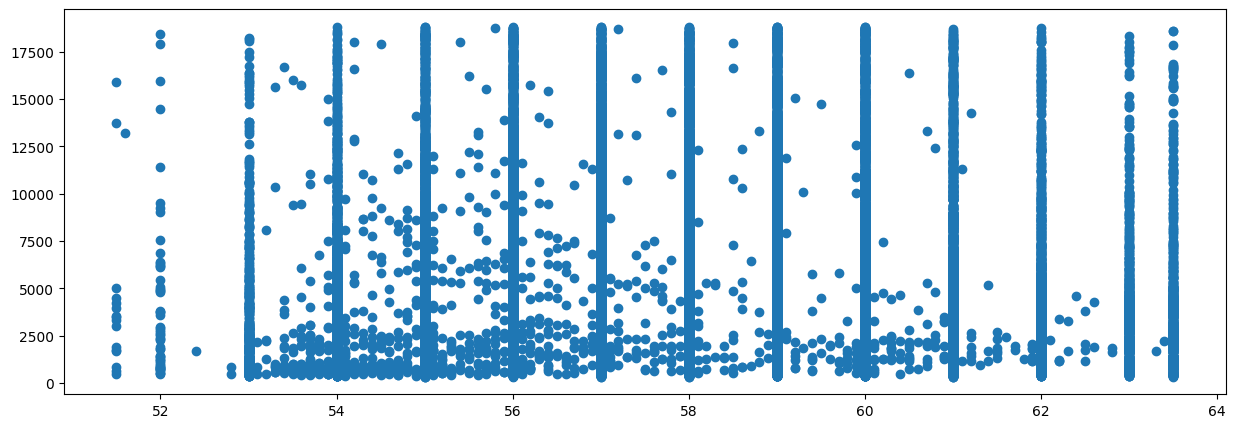

In [37]:
plt.figure(figsize=(15,5))
plt.scatter(df1['table'],df1['price'])

<Axes: ylabel='table'>

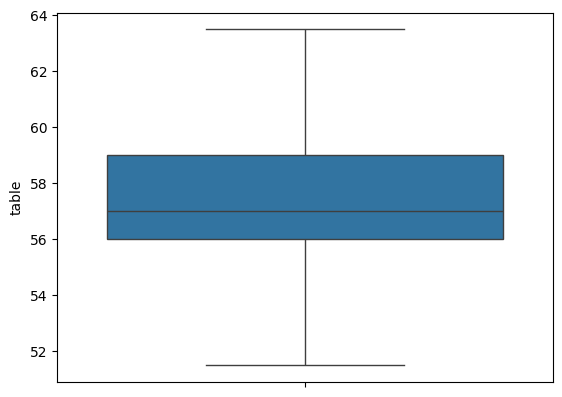

In [38]:
sns.boxplot(df1['table'])

In [39]:
df['x'].describe()

count    53794.000000
mean         5.731214
std          1.120695
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

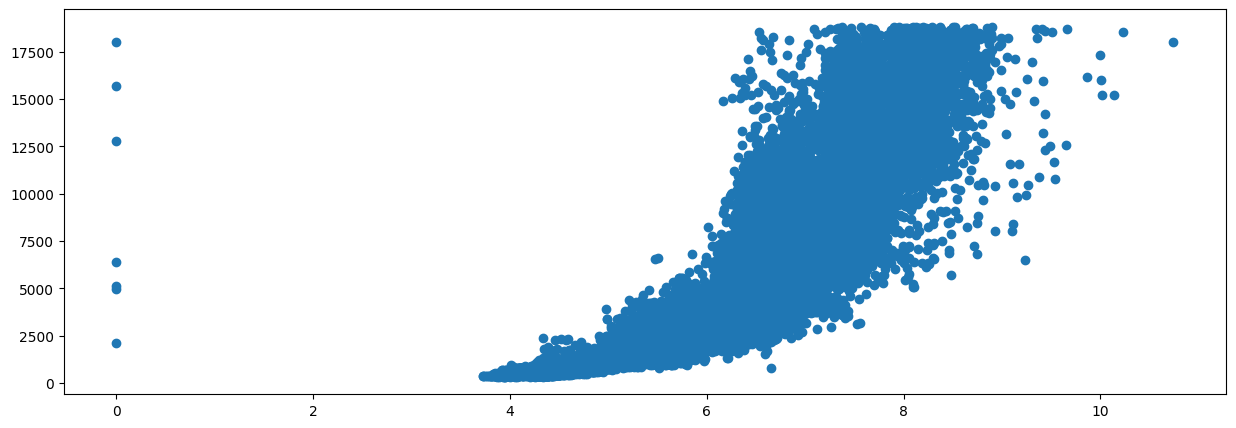

In [40]:
plt.figure(figsize=(15,5))
plt.scatter(df['x'],df['price'])

In [41]:
lower_x,upper_x = check_outliers('x')
lower_x,upper_x

(1.9649999999999999, 9.285)

In [42]:
df1 = df1[df['x']>=lower_x]
df1.loc[df1['x']>=upper_x,'x'] = upper_x

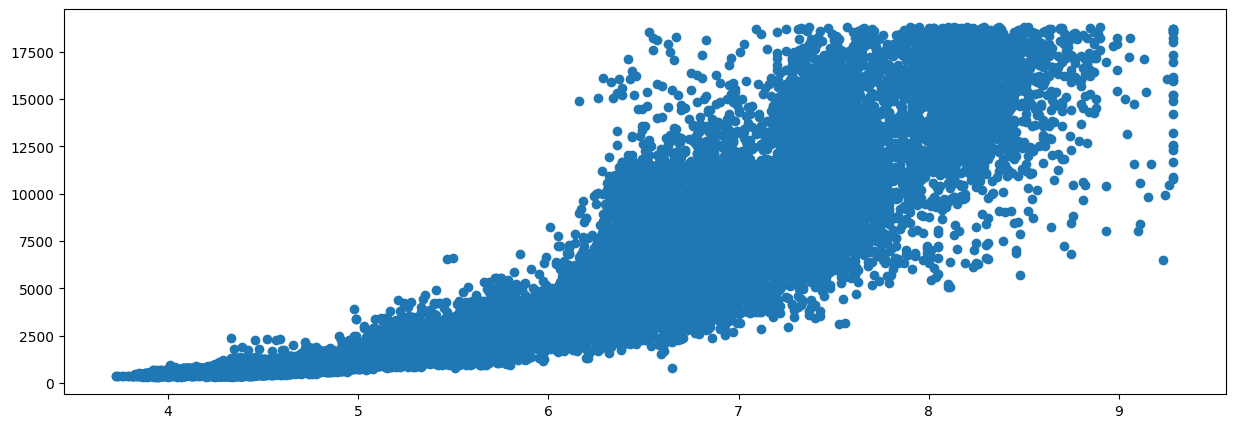

In [43]:
plt.figure(figsize=(15,5))
plt.scatter(df1['x'],df1['price'])

In [44]:
df['y'].describe()

count    53794.000000
mean         5.734653
std          1.141209
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

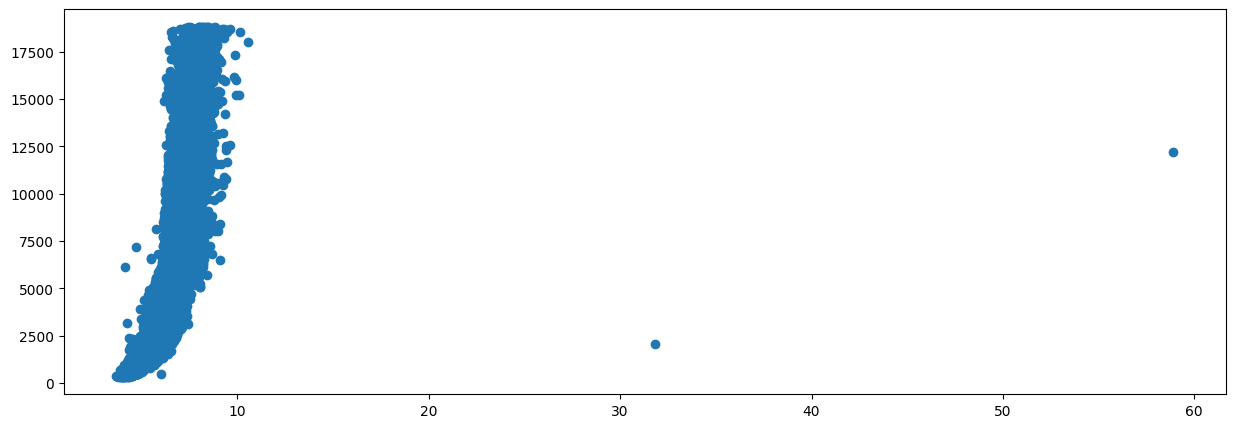

In [45]:
plt.figure(figsize=(15,5))
plt.scatter(df1['y'],df1['price'])

In [46]:
lower_y,upper_y = check_outliers('y')
lower_y,upper_y

(1.9899999999999993, 9.27)

In [47]:
df1.loc[df1['y']>=upper_y,'y'] = upper_y

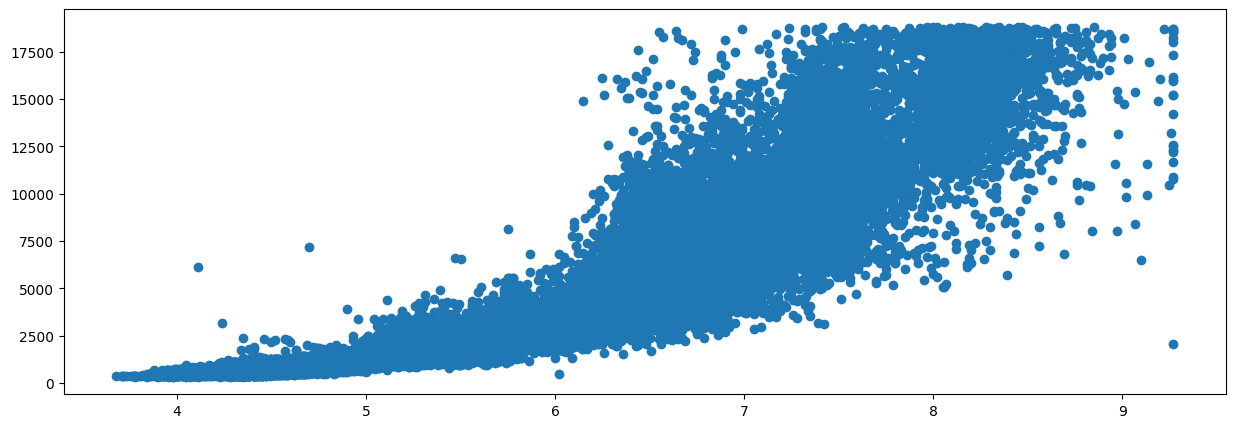

In [48]:
plt.figure(figsize=(15,5))
plt.scatter(df1['y'],df1['price'])

In [49]:
df['z'].describe()

count    53794.000000
mean         3.538714
std          0.705037
min          0.000000
25%          2.910000
50%          3.530000
75%          4.030000
max         31.800000
Name: z, dtype: float64

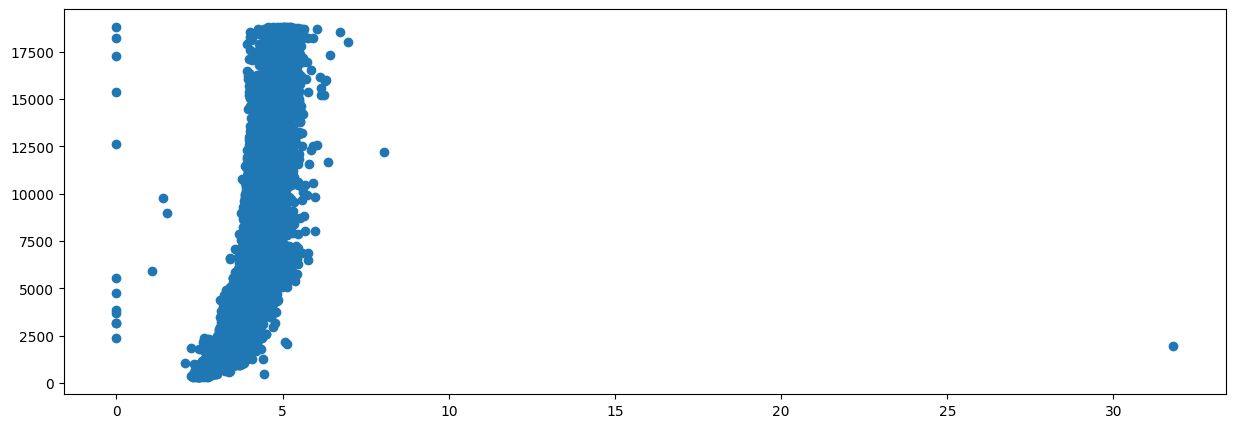

In [50]:
plt.figure(figsize=(15,5))
plt.scatter(df1['z'],df1['price'])

In [51]:
lower_z,upper_z = check_outliers('z')
lower_z,upper_z

(1.23, 5.710000000000001)

In [52]:
df1.loc[df1['z']>=upper_z,'z'] = upper_z
df1 = df1[df1['z']>=lower_z]


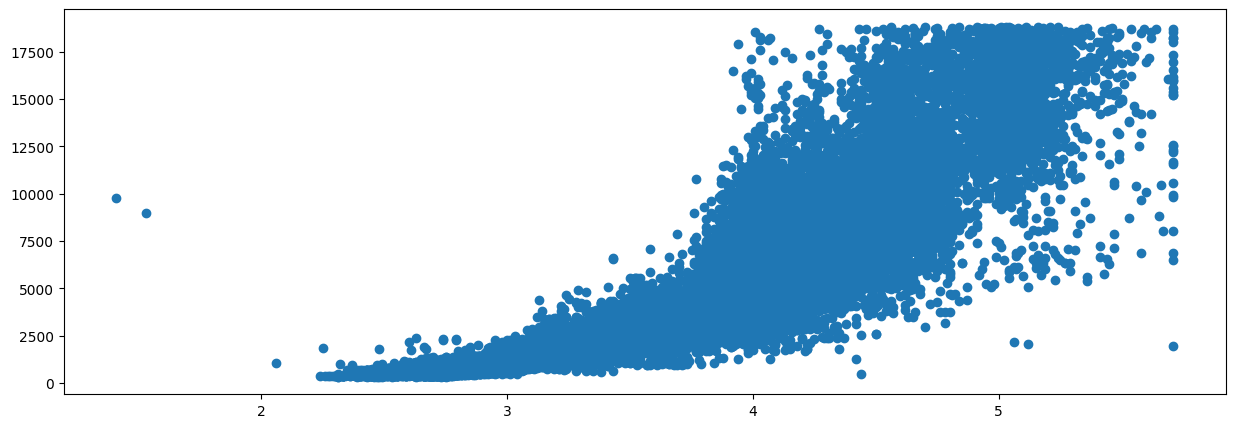

In [53]:
plt.figure(figsize=(15,5))
plt.scatter(df1['z'],df1['price'])